In [118]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt

In [41]:
path = "./Resources/sample_base.csv"
fraud_df = pd.read_csv(path,header='infer',index_col=None)
fraud_df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,...,0,1500.0,0,INTERNET,16.967770,other,0,1,0,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,...,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,0,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,...,0,200.0,0,INTERNET,16.068595,other,0,1,0,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,...,0,200.0,0,INTERNET,1.378683,linux,1,1,0,7


In [43]:
fraud_df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.1,0.771248,-1,192,20,0.008449,-1.050951,AB,2570,...,0,1500.0,0,INTERNET,37.831889,windows,0,1,0,2
1,0,0.9,0.868609,-1,8,30,0.003503,-0.683337,AB,1081,...,1,200.0,0,INTERNET,1.610226,linux,1,1,0,6
2,0,0.6,0.461974,30,8,30,0.006326,-0.916832,AB,2162,...,0,500.0,0,INTERNET,5.502750,linux,0,1,0,3
3,0,0.9,0.388111,31,2,50,0.010480,-0.817218,AB,2676,...,1,1500.0,0,INTERNET,3.209488,windows,1,1,0,4
4,0,0.9,0.512189,-1,249,50,0.013239,-0.230889,AB,621,...,1,500.0,0,INTERNET,8.416212,other,1,1,0,7


In [44]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        200000 non-null  int64  
 1   income                            200000 non-null  float64
 2   name_email_similarity             200000 non-null  float64
 3   prev_address_months_count         200000 non-null  int64  
 4   current_address_months_count      200000 non-null  int64  
 5   customer_age                      200000 non-null  int64  
 6   days_since_request                200000 non-null  float64
 7   intended_balcon_amount            200000 non-null  float64
 8   payment_type                      200000 non-null  object 
 9   zip_count_4w                      200000 non-null  int64  
 10  velocity_6h                       200000 non-null  float64
 11  velocity_24h                      200000 non-null  f

In [50]:
fraud_df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [46]:
fraud_df['fraud_bool'].value_counts()

fraud_bool
0    197768
1      2232
Name: count, dtype: int64

In [103]:
object_df = fraud_df.select_dtypes(include=['object','string'])
object_df

,payment_type,employment_status,housing_status,source,device_os
0,AB,CA,BE,INTERNET,windows
1,AB,CA,BC,INTERNET,linux
2,AB,CA,BC,INTERNET,linux
3,AB,CB,BA,INTERNET,windows
4,AB,CA,BA,INTERNET,other
...,...,...,...,...,...
199995,AC,CA,BE,INTERNET,other
199996,AC,CA,BA,INTERNET,windows
199997,AD,CA,BE,INTERNET,other
199998,AB,CC,BD,INTERNET,windows


In [104]:
object_col = object_df.columns.to_list()

In [105]:
object_df['payment_type'].value_counts()

payment_type
AB    74321
AA    51628
AC    50240
AD    23758
AE       53
Name: count, dtype: int64

In [106]:
encode_payments = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

encode_payments.fit(object_df['payment_type'].values.reshape(-1,1))

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [107]:
encode_employment = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

encode_employment.fit(object_df['employment_status'].values.reshape(-1,1))

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [108]:
encode_housing = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

encode_housing.fit(object_df['housing_status'].values.reshape(-1,1))

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [109]:
encode_source = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

encode_source.fit(object_df['source'].values.reshape(-1,1))

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [110]:
encode_device = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

encode_device.fit(object_df['device_os'].values.reshape(-1,1))

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [53]:
numerical_df = fraud_df.select_dtypes(exclude=['object','string'])
numerical_df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.1,0.771248,-1,192,20,0.008449,-1.050951,2570,6079.874351,...,1,11,0,1500.0,0,37.831889,0,1,0,2
1,0,0.9,0.868609,-1,8,30,0.003503,-0.683337,1081,1727.733739,...,1,1,1,200.0,0,1.610226,1,1,0,6
2,0,0.6,0.461974,30,8,30,0.006326,-0.916832,2162,1108.075600,...,0,1,0,500.0,0,5.502750,0,1,0,3
3,0,0.9,0.388111,31,2,50,0.010480,-0.817218,2676,3849.725772,...,1,19,1,1500.0,0,3.209488,1,1,0,4
4,0,0.9,0.512189,-1,249,50,0.013239,-0.230889,621,3282.921660,...,0,26,1,500.0,0,8.416212,1,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,0.1,0.315213,-1,381,20,0.029162,-0.961046,1774,10114.552068,...,1,-1,0,200.0,0,8.994981,1,1,0,4
199996,0,0.7,0.546810,-1,79,40,0.010970,-1.193305,1449,10863.678026,...,0,-1,1,1500.0,0,2.285306,1,0,0,0
199997,0,0.1,0.999241,28,13,20,0.013964,-1.608212,1097,7038.375489,...,1,26,0,200.0,0,5.855588,1,1,0,0
199998,0,0.2,0.022199,-1,55,60,0.014597,-1.380137,1766,8041.734623,...,1,5,0,200.0,0,9.292629,0,2,0,1


In [111]:
encoded_payments_df = pd.DataFrame(encode_payments.transform(object_df['payment_type'].values.reshape(-1, 1)), columns=encode_payments.get_feature_names_out())
encoded_employment_df = pd.DataFrame(encode_employment.transform(object_df['employment_status'].values.reshape(-1, 1)), columns=encode_employment.get_feature_names_out())
encoded_housing_df = pd.DataFrame(encode_housing.transform(object_df['housing_status'].values.reshape(-1, 1)), columns=encode_housing.get_feature_names_out())
encoded_source_df = pd.DataFrame(encode_source.transform(object_df['source'].values.reshape(-1, 1)), columns=encode_source.get_feature_names_out())
encoded_device_df = pd.DataFrame(encode_device.transform(object_df['device_os'].values.reshape(-1, 1)), columns=encode_device.get_feature_names_out())

dfs = [numerical_df, encoded_payments_df,encoded_employment_df,encoded_housing_df,encoded_source_df,encoded_device_df]

encoded_fraud_df = pd.concat(dfs,axis=1)

In [114]:
encoded_fraud_df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,x0_BE,x0_BF,x0_BG,x0_INTERNET,x0_TELEAPP,x0_linux,x0_macintosh,x0_other,x0_windows,x0_x11
0,0,0.1,0.771248,-1,192,20,0.008449,-1.050951,2570,6079.874351,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0.9,0.868609,-1,8,30,0.003503,-0.683337,1081,1727.733739,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0.6,0.461974,30,8,30,0.006326,-0.916832,2162,1108.075600,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,0.9,0.388111,31,2,50,0.010480,-0.817218,2676,3849.725772,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0.9,0.512189,-1,249,50,0.013239,-0.230889,621,3282.921660,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [116]:
import seaborn as sns
corr_df = encoded_fraud_df.corr()


c:\Users\kille\anaconda3\envs\dev\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


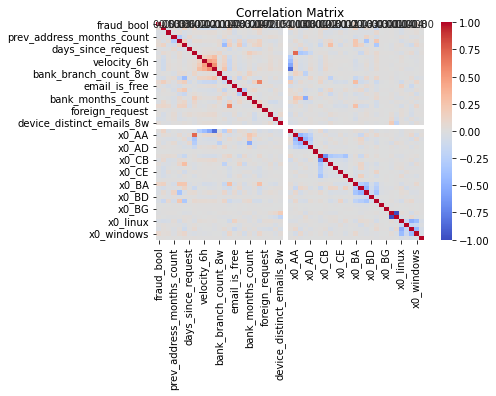

In [119]:
plt.figure()
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [121]:

encoded_fraud_df.to_csv('Resources/pre_processed_base.csv',index=False)